# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Muhammad Rozy Syahputra
- Email: rozyrangkuti27@gmail.com
- Id Dicoding: muhammadrozy

## Persiapan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Menyiapkan library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

### Menyiapkan data yang akan diguankan

## Data Understanding

Baca data karyawan dari file “employee_data.csv”

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/employee/employee_data.csv')
df.head(10)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
8,9,36,0.0,Travel_Frequently,635,Research & Development,18,1,Medical,1,...,1,80,0,8,2,3,8,1,1,7
9,10,32,0.0,Travel_Rarely,1018,Research & Development,3,2,Life Sciences,1,...,4,80,0,10,6,3,7,7,7,7


## Data Preparation / Preprocessing

Cek data shape dan data info

In [ ]:
print("Data Shape:", df.shape)

Data Shape: (1470, 35)


dataset terdiri dari 1.470 baris dan 35 kolom, artinya ada 1.470 karyawan yang bekerja di perusahaan edutech ini.

In [ ]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 1

Karena semua karyawa berusia diatas 18 tahun semua, maka kolom Over18 hanya ada 1 unique value yaitu "Y" dan kolom EmoloyeeCount juga hanya memiliki 1 unique value, sehingga kolom-kolom ini bisa dihapus karena tidak berpengaruh sama proses analisis dan modeling.

In [ ]:
df = df.drop(['Over18', 'EmployeeCount'], axis=1)
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,3,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,3,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,4,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,3,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,3,...,2,80,1,6,0,3,4,2,0,0


Cek Missing value pada dataset

In [ ]:
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


Berdasarkan hasil cek missing value diatas, diketahui bahwa hanya kolom Attrition yang memiliki missing values

Tampilkan data yang memiliki missing value

In [ ]:
df[df.isnull().any(axis=1)]

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,4,...,2,80,1,7,2,3,6,2,1,2
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,3,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,4,...,4,80,0,1,3,3,1,0,0,0
12,13,47,NaN,Travel_Rarely,571,Sales,14,3,Medical,3,...,3,80,1,11,4,2,5,4,1,2
18,19,25,NaN,Travel_Frequently,772,Research & Development,2,1,Life Sciences,4,...,3,80,2,7,6,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,24,NaN,Travel_Frequently,567,Research & Development,2,1,Technical Degree,1,...,3,80,0,6,2,3,6,3,1,3
1447,1448,42,NaN,Travel_Frequently,288,Research & Development,2,3,Life Sciences,4,...,3,80,1,24,3,1,20,8,13,9
1448,1449,38,NaN,Travel_Rarely,437,Sales,16,3,Life Sciences,2,...,2,80,0,8,5,4,3,2,1,2
1462,1463,41,NaN,Travel_Rarely,1206,Sales,23,2,Life Sciences,4,...,4,80,0,21,2,3,2,0,0,2


Diketahui bahwa nilai missing values ditandai dengan NaN, yang hanya ada pada kolom Attrition

hapus data yang mengandung missing values, karena dapat mengganggu hasil analisis dan akurasi prediksi pada project

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0


cek jumlah data yang tersisa setelah menghapus missing values

In [ ]:
df.shape

(1058, 33)

Cek data duplikat

In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat, berarti aman sehingga tidak perlu melakukan apapun pada dataset

Ringkasan statistik deskriptif untuk data numerik dan data kategorikal

In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,809.542533,8.978261,2.879017,2.712665,65.643667,2.73724,2.090737,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,408.478049,8.040608,1.031442,1.092959,20.324861,0.70473,1.136514,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.00000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,465.250000,2.000000,2.000000,2.000000,48.000000,2.00000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,817.500000,7.000000,3.000000,3.000000,65.000000,3.00000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,1168.500000,13.000000,4.000000,4.000000,83.000000,3.00000,3.000000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.00000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [ ]:
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,746,701,436,620,232,464,751


Cek attrition data type

In [ ]:
df["Attrition"].dtypes

dtype('float64')

In [ ]:
df["Attrition"].values

array([1., 1., 0., ..., 1., 0., 1.])

In [ ]:
df["Education"].dtypes

dtype('int64')

Karena nilai dari Attrition kolom adalah bilangan bulat tanpa desimal (0 & 1) sedangkan float mewakili bilangan desimal, maka bisa diganti data type nya menjadi int agar sama dengan kolom-kolom numerik lainnya

In [ ]:
df['Attrition'] = df['Attrition'].astype(int)
df['Attrition'].dtypes

dtype('int64')

### Ordinal Decoding

Pada tahap ordinal decoding ini, saya melakukan konversi encoded fitur pada dataframe ke label kategorikal yang sesuai, artinya saya ubah dari numerikal menjadi kategorikal fitur sehingga ketika membuat dashboard business yang muncul adalah bentuk kategorikal nya bukan bentuk numerikal nya.

In [ ]:
def ordinal_decoding(df, feature):
    """
    Mengonversi fitur yang dikodekan dalam DataFrame ke label kategorikal yang sesuai

    Parameters
        df (pandas.DataFrame) : DataFrame dengan fitur yang akan dikonversi
        Fitur (str or list of str) : Nama fitur yang akan dikonversi

    Returns
        pandas.DataFrame : DataFrame dengan fitur sebagai label kategorikal
    """

    if feature == 'Attrition':
        category = {0: 'No', 1: 'Yes'}
        df[feature] = df[feature].map(category)
    elif feature == 'Education':
        category = {1: 'Below College', 2: 'College', 3: 'Bachelor',
                    4: 'Master', 5: 'Doctor'}
        df[feature] = df[feature].map(category)
    elif feature in ['WorkLifeBalance', 'PerformanceRating']:
        category = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
        df[feature] = df[feature].map(category)
    else:
        category = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
        for f in feature:
            df[f] = df[f].map(category)

    return df

Mengonversi data numerik menjadi data kategorikal menggunakan fungsi yang ditentukan, yaitu fungsi ordinal_decoding

In [ ]:
df = ordinal_decoding(df, 'Attrition')
df = ordinal_decoding(df, 'Education')
df = ordinal_decoding(df, ['EnvironmentSatisfaction', 'JobInvolvement',
                           'JobSatisfaction', 'RelationshipSatisfaction'])
df = ordinal_decoding(df, ['PerformanceRating', 'WorkLifeBalance'])

df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Very High,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Very High,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Medium,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,High,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,...,Low,80,0,10,2,Medium,10,7,1,9
1465,1466,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,...,Very High,80,0,10,4,Very High,1,0,0,0
1467,1468,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,...,Very High,80,0,1,4,Medium,1,1,0,0
1468,1469,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,...,Medium,80,1,6,0,High,4,2,0,0


Setelah kita decoding dataset ke bentuk kategorikal, selanjutnya export dataset yang sudah clean untuk business dashboard

In [ ]:
df.to_csv('employee_data_cleaned.csv', index=False)

### Exploratory Data Analysis

**Bagaimana Attrition bergantung pada usia?**

In [ ]:
age_att = df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count(), include_groups=False).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Jumlah orang dalam organisasi berdasarkan usia')

**Observasi:** Seperti yang terlihat pada grafik di atas, atrisi maksimum terjadi pada kelompok usia 28-32 tahun. Tingkat atrisi terus menurun seiring dengan bertambahnya usia, karena orang-orang mencari stabilitas dalam pekerjaan mereka pada masa-masa ini. Juga pada usia yang sangat muda, yaitu dari 18-20 tahun, kemungkinan seorang karyawan meninggalkan organisasi jauh lebih banyak - karena mereka sedang menjelajah pada saat itu. Mencapai titik impas pada usia 21 tahun

**Apakah pendapatan merupakan faktor utama yang menyebabkan karyawan keluar?**

In [ ]:
rate_att=df.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Jumlah Dasar Pendapatan Bulanan Orang dalam Organisasi')
fig.show()

<ipython-input-23-f2733297aad2>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

<ipython-input-23-f2733297aad2>:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Observasi:** Seperti yang terlihat pada grafik di atas, tingkat gesekan terlihat tinggi pada tingkat pendapatan yang sangat rendah - kurang dari 5 ribu per bulan. Hal ini semakin menurun - tetapi lonjakan kecil terlihat di sekitar 10 ribu - yang mengindikasikan kehidupan kelas menengah. Mereka cenderung bergeser ke arah standar hidup yang lebih baik, dan karenanya pindah ke pekerjaan yang berbeda. Ketika pendapatan bulanan cukup baik, kemungkinan seorang karyawan meninggalkan organisasi menjadi rendah - seperti yang terlihat pada garis datar

**Apakah Departemen pekerjaan berdampak pada Attrition?**

In [ ]:
dept_att=df.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Jumlah Orang dari segi Departemen dalam Organisasi')
fig.show()

<ipython-input-24-ddeda9270208>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Obervasi**: Data ini hanya terdiri dari 3 departemen utama - di antaranya departemen Sales memiliki tingkat atrisi tertinggi (20,68%), diikuti oleh Departemen Human Resources (15,78%). Departemen Research & Development memiliki tingkat atrisi paling rendah, yang menunjukkan stabilitas dan isi dari departemen tersebut seperti yang dapat dilihat dari grafik di atas (15,26%).

**Bagaimana dampak kepuasan lingkungan terhadap Attrition?**

In [ ]:
sats_att=df.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Jumlah orang pada tingkat kepuasan lingkungan dalam organisasi')

<ipython-input-25-1928c0f89f80>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Observasi**:
Pada tingkat kepuasan Low & Medium, kemungkinan orang untuk meninggalkan organisasi sedikit menurun. Hal ini menunjukkan harapan yang lebih baik untuk bertahan di sebuah organisasi. Namun, ketika kita bergerak dari level High & Very High, orang cenderung pindah untuk mendapatkan kesempatan dan pengalaman yang lebih baik. Tingkat Attrition hampir stagnan untuk tingkat kepuasan yang lebih tinggi.

Bagaimana Kepuasan Kerja sendiri berdampak pada Attrition?

In [ ]:
jsats_att=df.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att, x='JobSatisfaction', y='Counts', color='Attrition', title='Jumlah Orang pada Tingkat Kepuasan Kerja dalam Organisasi')

<ipython-input-26-03ef213cc244>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Observasi**: Dengan meningkatnya kepuasan kerja, tingkat Attrition menurun seperti yang terlihat pada grafik di atas. Juga dari rentang Low ke Medium kita dapat menyimpulkan (seperti yang terlihat di atas dalam Kepuasan Lingkungan), tingkat atrisi turun, tetapi meningkat dari Medium ke High, di mana orang-orang cenderung memilih peluang yang lebih baik.

**Apakah saham perusahaan untuk karyawan berdampak pada Attrition?**

In [ ]:
stock_att=df.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Fasilitas tingkat saham dari sudut pandang Orang dalam Organisasi')

<ipython-input-27-65594e41c940>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Observasi:**
Kecenderungan karyawan untuk meninggalkan organisasi jauh lebih banyak ketika opsi yang tersedia terbatas. Karena saham merupakan jumlah uang yang sangat besar sementara tinggal selama beberapa tahun, orang tidak ingin kehilangan kesempatan itu. Orang dengan opsi saham yang sangat terbatas/tidak ada, memiliki kebebasan untuk meninggalkan organisasi sesuka hati.

Bagaimana Work Life Balance berdampak pada tingkat Attrition secara keseluruhan?

In [ ]:
wlb_att=df.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb_att,x='WorkLifeBalance',y='Counts',color='Attrition',title='Jumlah Orang pada tingkat Work Life Balance dalam Organisasi')

<ipython-input-28-8c4a77a40dee>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Observasi:**
Orang-orang dengan tingkat keseimbangan kehidupan kerja yang buruk telah menyesuaikan diri dengan pekerjaan mereka, tetapi seperti yang terlihat pada parameter di atas dengan skor kehidupan kerja yang lebih baik, orang-orang lebih terbiasa dengan kehidupan yang lebih baik dan lebih ingin melakukan attrisi. Namun tren ini akan hilang ketika keseimbangan kehidupan kerja benar-benar baik, dan orang merasa puas dengan pekerjaan yang mereka lakukan.

**Bagaimana Pengalaman Kerja mempengaruhi keluarnya karyawan?**

In [ ]:
ncwrd_att=df.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Jumlah Orang dengan tingkat pengalaman Kerja dalam Organisasi')

<ipython-input-29-2bdabc965a8d>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Observasi:
Seperti yang terlihat dari grafik di atas, jelas bahwa karyawan yang memulai karir mereka dengan perusahaan - atau telah beralih ke perusahaan pada tahun-tahun awal karir mereka, memiliki peluang lebih tinggi untuk meninggalkan organisasi ke perusahaan lain. Orang-orang yang telah mendapatkan banyak pengalaman - bekerja di beberapa perusahaan cenderung bertahan di perusahaan tempat mereka bergabung.

**Bagaimana durasi kerja dalam peran saat ini berdampak pada Attrisi?**

In [ ]:
yrscr_att=df.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Jumlah Orang yang bekerja selama bertahun-tahun di sebuah Organisasi')

<ipython-input-30-9c268bd7a588>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Observasi:** Saya telah melihat bahwa orang lebih cenderung meninggalkan organisasi pada tahun-tahun awal dalam peran mereka. Ketika orang berada dalam peran yang sama untuk jangka waktu yang lama, mereka cenderung bertahan lebih lama untuk naik jabatan.

**Apakah persentase kenaikan gaji berdampak pada Attrisi?**

In [ ]:
hike_att=df.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Jumlah Persentase Kenaikan gaji yang diterima orang dalam sebuah Organisasi')

<ipython-input-31-d8618eeb9c26>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Observasi:
Kenaikan gaji yang lebih tinggi memotivasi orang untuk bekerja lebih baik, dan bertahan dalam organisasi. Oleh karena itu, Saya melihat kemungkinan karyawan meninggalkan organisasi yang memberikan kenaikan gaji lebih rendah, jauh lebih besar daripada perusahaan yang memberikan kenaikan gaji yang baik.

**Apakah manajer menjadi alasan orang mengundurkan diri?**

In [ ]:
man_att=df.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Jumlah orang yang menghabiskan waktu bertahun-tahun dengan seorang Manajer dalam sebuah Organisasi')

<ipython-input-32-4614c2c1aa44>:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



**Observasi:**
Saya melihat ada 3 lonjakan besar dalam tingkat atrisi, ketika Saya menganalisis hubungan karyawan dengan manajer mereka. Di awal, di mana waktu yang dihabiskan dengan manajer relatif lebih sedikit - orang cenderung meninggalkan pekerjaan mereka - dengan mempertimbangkan hubungan mereka dengan manajer sebelumnya. Pada rentang waktu rata-rata 2 tahun, ketika karyawan merasa mereka membutuhkan peningkatan, mereka juga cenderung mencari perubahan. Ketika waktu yang dihabiskan dengan manajer sedikit lebih tinggi (sekitar 7 tahun) - orang cenderung merasa perkembangan karier mereka stagnan, dan cenderung mencari perubahan. Namun, ketika waktu yang dihabiskan bersama seorang manajer sangat tinggi, orang akan merasa puas dengan pekerjaan mereka. Oleh karena itu, kemungkinan seorang karyawan untuk mengundurkan diri menjadi sangat rendah.

**Heatmap Correlation Matrix**

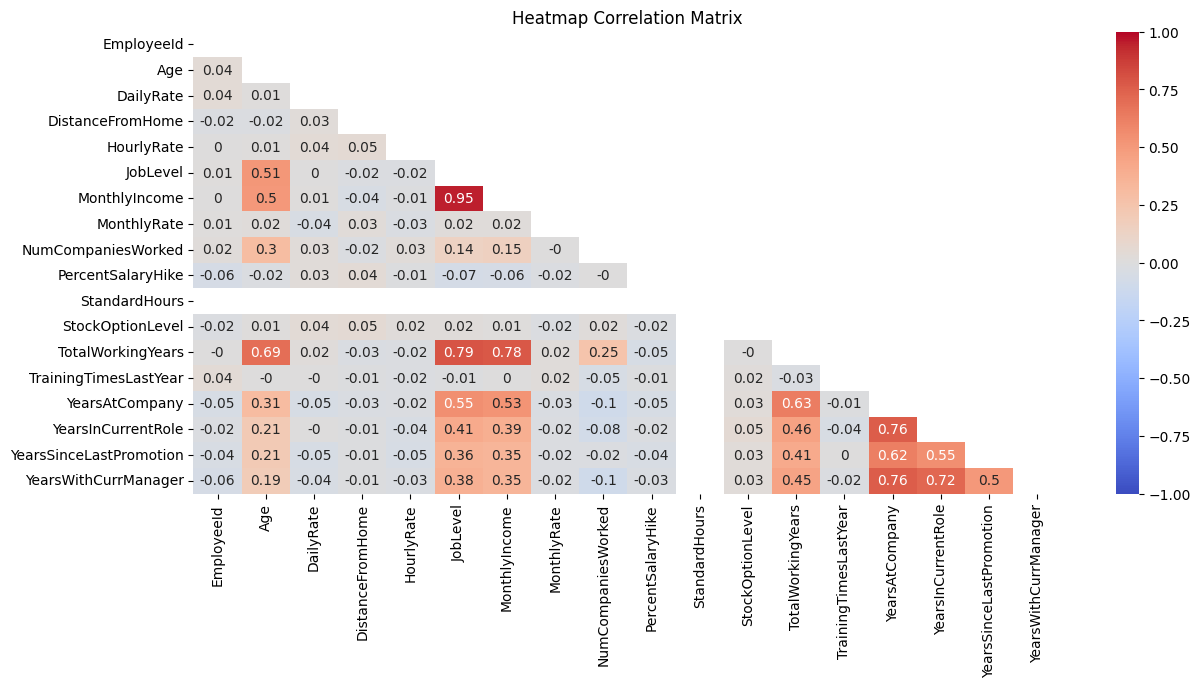

In [ ]:
plt.figure(figsize=(14, 6))
correlation_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='coolwarm', mask=mask)
plt.title('Heatmap Correlation Matrix')
plt.show()

Berdasarkan plot matriks korelasi di atas, kita dapat menyimpulkan:

1.   **Age** memiliki korelasi positif yang cukup kuat dengan **TotalWorkingYears**, karena semakin bertambahnya usia, maka total masa kerja relatif lebih lama.
2.   **Age** memiliki korelasi positif yang cukup kuat dengan **JobLevel**, karena semakin bertambahnya usia karyawan, umumnya karyawan akan menduduki posisi yang lebih tinggi di perusahaan.
3.   **Age** memiliki korelasi positif yang cukup kuat dengan **MonthlyIncome**, karena semakin bertambahnya usia karyawan, umumnya karyawan akan mendapatkan penghasilan yang lebih besar.
4.   **JobLevel** memiliki korelasi positif yang sangat kuat dengan **MonthlyIncome**, karena karyawan yang lebih senior cenderung mendapatkan penghasilan yang lebih tinggi.
5.   **JobLevel** memiliki korelasi positif yang sangat kuat dengan **TotalWorkingYears**, karena karyawan yang lebih senior umumnya memiliki pengalaman dan masa kerja yang lebih lama.
6.   **JobLevel** memiliki korelasi positif yang cukup kuat dengan **YeasAtCompany**, karena karyawan yang lebih senior cenderung sudah bekerja bertahun-tahun di perusahaan yang sama.
7.   **MonthlyIncome** memiliki korelasi positif yang sangat kuat dengan **TotalWorkingYears**, karena semakin tinggi pendapatan, maka semakin lama pula jumlah tahun bekerja.
8.   **MonthlyIncome** memiliki korelasi positif yang cukup kuat dengan **YearsAtCompany**, karena semakin tinggi pendapatan, umumnya semakin lama karyawan bekerja di perusahaan yang sama.
9.   **TotalWorkingYears** memiliki korelasi positif yang cukup kuat dengan **YearsAtCompany**, karena semakin lama rentang masa kerja, umumnya semakin lama karyawan bekerja di perusahaan yang sama.
10.  **YearsAtCompany** memiliki korelasi positif yang sangat kuat dengan **YearsInCurrentRole**.
11.  **YearsAtCompany** memiliki korelasi positif yang sangat kuat dengan **YearsWithCurrentManager**.
12.  **YearsAtCompany** memiliki korelasi positif yang cukup kuat dengan **YearsSinceLastPromotion**.
13.  **YearsInCurrentRole** memiliki korelasi positif yang sangat kuat dengan **YearsWithCurrentManager**.
14.  **YearsInCurrentRole** memiliki korelasi positif yang cukup kuat dengan **YearsSinceLastPromotion**.
15.  **YearsSinceLastPromotion** memiliki korelasi positif yang cukup kuat dengan **YearsWithCurrentManager**.

In [ ]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Very High,10,0,2,7
3,4,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Very High,20,4,4,8
6,7,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Medium,4,3,0,2
7,8,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,High,5,2,1,4


Dalam dataset ini, fitur label yang digunakan adalah Attrition, apakah karyawan meninggalkan perusahaan (1 untuk yes), dan apakah karyawan tetap tinggal dan meninggalkan perusahaan (0 untuk No).

**Feature Selection**

Karena ada beberapa fitur yang tidak berkontribusi atau mempengaruhi tingkat attrition pada dataset ini, misalnya EmployeeID, maka fitur-fitur tersebut perlu dihilangkan agar model Machine Learning hanya melatih model dari fitur data yang paling berpengaruh.

In [ ]:
# Hapus fitur yang tidak perlu
df = df.drop('EmployeeId', axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,Yes,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,Female,...,Low,80,0,15,2,Low,1,0,0,0
2,51,Yes,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,Male,...,High,80,3,18,2,Very High,10,0,2,7
3,42,No,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,Female,...,Very High,80,1,23,2,Very High,20,4,4,8
6,40,No,Travel_Rarely,1124,Sales,1,College,Medical,Medium,Male,...,High,80,3,6,2,Medium,4,3,0,2
7,55,Yes,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,Male,...,Very High,80,1,24,2,High,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,Yes,Non-Travel,1366,Research & Development,24,College,Technical Degree,Medium,Male,...,Low,80,0,10,2,Medium,10,7,1,9
1465,38,No,Travel_Rarely,168,Research & Development,1,Bachelor,Life Sciences,High,Female,...,Very High,80,0,10,4,Very High,1,0,0,0
1467,28,Yes,Travel_Rarely,1485,Research & Development,12,Below College,Life Sciences,High,Female,...,Very High,80,0,1,4,Medium,1,1,0,0
1468,40,No,Non-Travel,458,Research & Development,16,College,Life Sciences,High,Male,...,Medium,80,1,6,0,High,4,2,0,0


**Label Encoding**

In [ ]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

In [ ]:
# Fitur kategorikal yang perlu di encoded
categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

In [ ]:
le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)

**Data Normalization**

In [ ]:
# Fitur numerik yang perlu dinormalisasi
numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
scaler = MinMaxScaler()
df[numerical] = scaler.fit_transform(df[numerical])

**Data Checking**

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0.452381,1,2,0.743737,1,0.357143,2,3,1,0,...,1,0.0,0.000000,0.375,0.333333,1,0.025,0.000000,0.000000,0.000000
2,0.785714,1,2,0.874016,1,0.107143,4,1,1,1,...,0,0.0,1.000000,0.450,0.333333,3,0.250,0.000000,0.133333,0.411765
3,0.571429,0,1,0.324266,2,0.892857,0,2,0,0,...,3,0.0,0.333333,0.575,0.333333,3,0.500,0.222222,0.266667,0.470588
6,0.523810,0,2,0.731568,2,0.000000,2,3,2,1,...,0,0.0,1.000000,0.150,0.333333,2,0.100,0.166667,0.000000,0.117647
7,0.880952,1,2,0.445956,1,0.035714,0,3,3,1,...,3,0.0,0.333333,0.600,0.333333,0,0.125,0.111111,0.066667,0.235294


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1058 non-null   float64
 1   Attrition                 1058 non-null   int64  
 2   BusinessTravel            1058 non-null   int64  
 3   DailyRate                 1058 non-null   float64
 4   Department                1058 non-null   int64  
 5   DistanceFromHome          1058 non-null   float64
 6   Education                 1058 non-null   int64  
 7   EducationField            1058 non-null   int64  
 8   EnvironmentSatisfaction   1058 non-null   int64  
 9   Gender                    1058 non-null   int64  
 10  HourlyRate                1058 non-null   float64
 11  JobInvolvement            1058 non-null   int64  
 12  JobLevel                  1058 non-null   float64
 13  JobRole                   1058 non-null   int64  
 14  JobSatisfacti

In [ ]:
df.describe().round(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,...,1058.0000,1058.0,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000,1058.0000
mean,0.4537,0.1692,1.6040,0.5065,1.2656,0.2849,1.6541,2.2552,1.4660,0.5860,...,1.5028,0.0,0.2543,0.2859,0.4616,0.8478,0.1766,0.2367,0.1469,0.2437
std,0.2241,0.3751,0.6647,0.2924,0.5169,0.2872,1.6222,1.3255,1.2154,0.4928,...,1.2143,0.0,0.2792,0.2004,0.2171,1.1160,0.1566,0.2010,0.2178,0.2117
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2857,0.0000,1.0000,0.2600,1.0000,0.0357,0.0000,1.0000,0.0000,0.0000,...,0.0000,0.0,0.0000,0.1500,0.3333,0.0000,0.0750,0.1111,0.0000,0.1176
50%,0.4286,0.0000,2.0000,0.5122,1.0000,0.2143,1.0000,2.0000,1.0000,1.0000,...,2.0000,0.0,0.3333,0.2500,0.5000,0.0000,0.1250,0.1667,0.0667,0.1765
75%,0.5952,0.0000,2.0000,0.7634,2.0000,0.4286,4.0000,3.0000,3.0000,1.0000,...,3.0000,0.0,0.3333,0.4000,0.5000,2.0000,0.2250,0.3889,0.2000,0.4118
max,1.0000,1.0000,2.0000,1.0000,2.0000,1.0000,4.0000,5.0000,3.0000,1.0000,...,3.0000,0.0,1.0000,1.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000


**Data Splitting**

In [ ]:
# Split data menjadi variabel independen (X) dan variabel dependen (y) sebagai label
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [ ]:
# Split data menjadi train data dan test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=20241116, stratify=y)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (846, 31)
y_train : (846,)
X_test  : (212, 31)
y_test  : (212,)


## Modeling

In [ ]:
# Models dan metrics initialization
models, accuracy, precision, recall, f1 = {}, {}, {}, {}, {}


models['DT'] = DecisionTreeClassifier(class_weight='balanced')
models['RF'] = RandomForestClassifier(class_weight='balanced')
models['GB'] = GradientBoostingClassifier()
models['LR'] = LogisticRegression(class_weight='balanced', max_iter=10000)
models['KNN'] = KNeighborsClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC(class_weight='balanced', max_iter=10000)

for i in models.keys():
    models[i].fit(X_train, y_train)

    pred = models[i].predict(X_test)

    accuracy[i] = accuracy_score(pred, y_test)
    precision[i] = precision_score(pred, y_test)
    recall[i] = recall_score(pred, y_test)
    f1[i] = f1_score(pred, y_test)

In [ ]:
model_metrics = pd.DataFrame({
    'Accuracy': accuracy.values(),
    'Precision': precision.values(),
    'Recall': recall.values(),
    'F1-Score': f1.values()
}, index=models.keys())

model_metrics

,Accuracy,Precision,Recall,F1-Score
DT,0.787736,0.305556,0.354839,0.328358
RF,0.834906,0.055556,0.666667,0.102564
GB,0.839623,0.361111,0.541667,0.433333
LR,0.750000,0.750000,0.380282,0.504673
KNN,0.830189,0.111111,0.500000,0.181818
NB,0.707547,0.694444,0.328947,0.446429
SVM,0.735849,0.722222,0.361111,0.481481


Berdasarkan metrik evaluasi untuk setiap model, Gradient Boosting Classifier memiliki akurasi model yang paling tinggi di antara yang lain, sehingga model ini yang akan digunakan.

In [ ]:
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb

GradientBoostingClassifier()

In [ ]:
y_train_gb = model_gb.predict(X_train)
y_test_gb = model_gb.predict(X_test)

## Evaluation

In [ ]:
def evaluation_report(y_train, y_predicted, title='Data'):
    print('Classification Report on ' + title)
    print(classification_report(y_train, y_predicted))

    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_train, y_predicted), annot=True, fmt='d')
    plt.title('Confusion Matrix on ' + title)
    plt.ylabel('True Label Attrition', fontsize=10)
    plt.xlabel('Predicted Label Attrition', fontsize=10)
    plt.yticks(fontsize=8)
    plt.xticks(fontsize=8)
    plt.show()

Classification Report on Training Data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       703
           1       1.00      0.80      0.89       143

    accuracy                           0.97       846
   macro avg       0.98      0.90      0.93       846
weighted avg       0.97      0.97      0.96       846



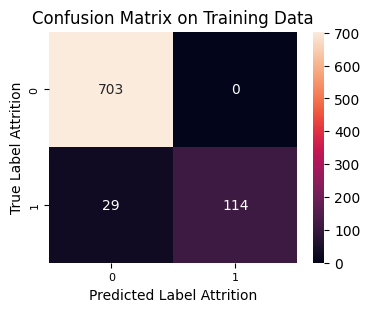

In [ ]:
evaluation_report(y_train, y_train_gb, title='Training Data')

Classification Report on Testing Data
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       176
           1       0.54      0.36      0.43        36

    accuracy                           0.84       212
   macro avg       0.71      0.65      0.67       212
weighted avg       0.82      0.84      0.83       212



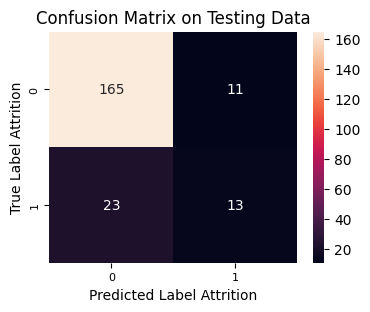

In [ ]:
evaluation_report(y_test, y_test_gb, title='Testing Data')

**Hyperparameter Tuning**

Hyperparameter tuning menggunakan Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 250, 500],
    'subsample': [1.0],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_depth': [3, 10, 20]

}

clf = GridSearchCV(estimator=model_gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
clf

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 250, 500], 'subsample': [1.0]},
             verbose=3)

Fit untuk estimator parameter model terbaik

In [ ]:
best_model = clf.fit(X_train, y_train)
best_model.best_estimator_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GradientBoostingClassifier(max_depth=10, min_samples_leaf=10,
                           min_samples_split=3, n_estimators=250)

Memprediksi data pelatihan dan pengujian menggunakan model terbaik

In [ ]:
y_train_best = best_model.predict(X_train)
y_test_best = best_model.predict(X_test)

Classification Report on Training Data Best Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       703
           1       1.00      1.00      1.00       143

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



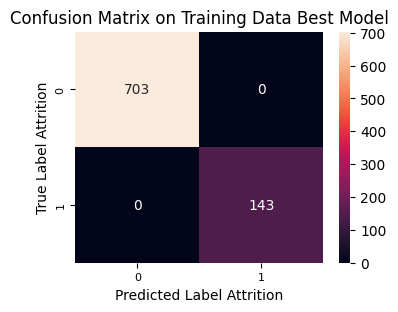

In [ ]:
evaluation_report(y_train, y_train_best, title='Training Data Best Model')

Model Export

In [ ]:
import joblib
joblib.dump(best_model, 'model_gb.joblib')

['model_gb.joblib']

Project Requeirements

In [ ]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=3e7651b001cfb0a803404c16fba82ae6aa449a3295d441b38e9047cc076c1428
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.12.3 which is incompatible.


In [ ]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/submission_1_BPDS" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/submission_1_BPDS/requirements.txt


**KESIMPULAN**

1. Pada tahap awal karier, karyawan cenderung lebih sering berpindah pekerjaan. Namun, setelah mereka membangun keluarga atau mencapai stabilitas dalam karier, mereka cenderung menetap lebih lama di satu perusahaan dan melakukan perpindahan secara vertikal di dalam perusahaan tersebut.
2. Gaji merupakan faktor motivasi yang kuat bagi karyawan, di mana peningkatan gaji berkontribusi pada menurunnya tingkat turnover. Karyawan dengan kompensasi yang lebih tinggi cenderung menunjukkan loyalitas yang lebih besar terhadap perusahaan.
3. Work Life Balance merupakan salah satu faktor motivasi utama bagi karyawan. Namun demikian, karyawan yang telah memiliki keseimbangan kerja dan kehidupan pribadi yang baik tetap cenderung mencari peluang baru untuk meningkatkan standar hidup mereka.
4. Departemen yang menuntut pencapaian target tinggi, seperti Sales, cenderung memiliki tingkat turnover yang lebih tinggi dibandingkan dengan departemen yang bersifat administratif, seperti Human Resources.
5. Karyawan yang merasakan kepuasan kerja dan menikmati lingkungan kerja yang positif cenderung menunjukkan loyalitas tinggi terhadap perusahaan, yang tentunya berdampak baik bagi keberlangsungan perusahaan. Sebaliknya, karyawan yang kurang puas dengan proyek yang sedang mereka jalani lebih cenderung meninggalkan perusahaan.